In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset
df = pd.read_csv("Job.csv")  # Replace with your actual path
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()


Dataset contains 1257 rows and 3 columns.


,Job Title,Company,Description
0,Sales Specialist,Google,minimum qualifications bachelors degree or equ...
1,Apple Solutions Consultant,Apple,description as an asc you will be highly influ...
2,Licensing Coordinator - Consumer Products,Netflix,its an amazing time to be joining netflix as w...
3,Web Designer,Robert Half,description web designers looking to expand yo...
4,Web Developer,TrackFive,at trackfive weve got big goals were on a miss...


Number of duplicate rows: 200
Duplicate Rows:
                                              Job Title  \
878                   Administration Officer - job post   
879                 Administrateur de ventes - job post   
880   Remote Sales Specialist (Arabic Speaking) - jo...   
881               Stage en Ressource humaine - job post   
882                      Sales Assistant (F) - job post   
...                                                 ...   
1223                  Senior Unity Developer - job post   
1224                  Chargé(e) de Chiffrage - job post   
1225                    Inphographiste - Web - job post   
1226                     Senior AI Developer - job post   
1227      Profilo italiano : 100% backoffice - job post   

                            Company  \
878   Coventry University Bouskoura   
879                AMSTERGI MOROCCO   
880                   SmartCheck360   
881                Tactical Tactics   
882                   Phone Gadgets   
...        

C:\Users\imane\AppData\Local\Temp\ipykernel_20192\1965594171.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Unique Rows", "Duplicate Rows"], y=[len(df) - len(duplicate_rows), len(duplicate_rows)], palette="coolwarm")


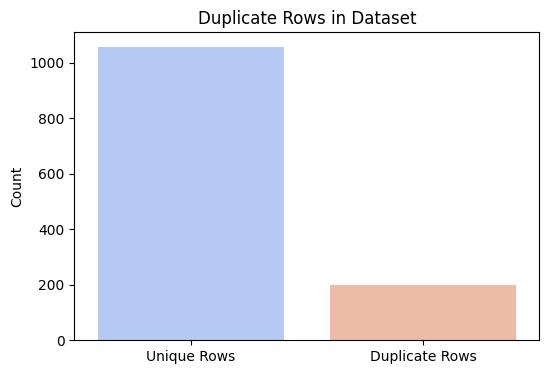

In [2]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display duplicate rows
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)

# Plot duplicate row count
plt.figure(figsize=(6, 4))
sns.barplot(x=["Unique Rows", "Duplicate Rows"], y=[len(df) - len(duplicate_rows), len(duplicate_rows)], palette="coolwarm")
plt.title("Duplicate Rows in Dataset")
plt.ylabel("Count")
plt.show()


In [ ]:
# Drop duplicates if necessary
df_cleaned = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")
# df_cleaned.to_csv("Job.csv", index=False)

Number of rows after removing duplicates: 1057


C:\Users\imane\AppData\Local\Temp\ipykernel_20192\2602869988.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="viridis")


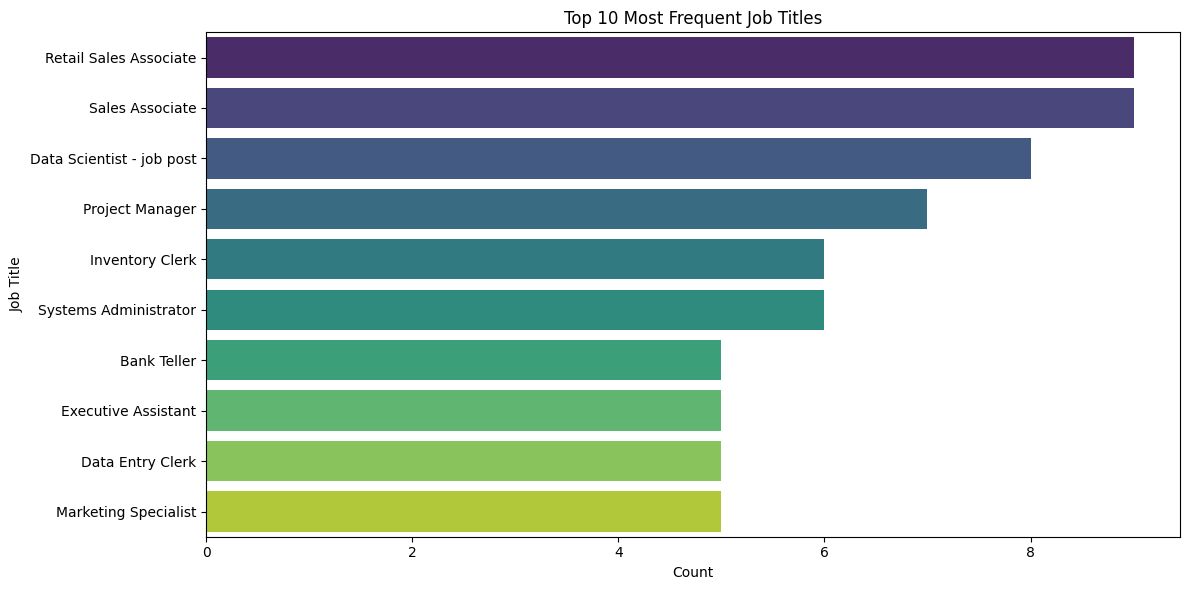

In [4]:
# Top 10 most frequent job titles
top_job_titles = df["Job Title"].value_counts().head(10)

# Bar plot for job titles
plt.figure(figsize=(12, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="viridis")
plt.title("Top 10 Most Frequent Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


C:\Users\imane\AppData\Local\Temp\ipykernel_20192\2992166895.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="coolwarm")


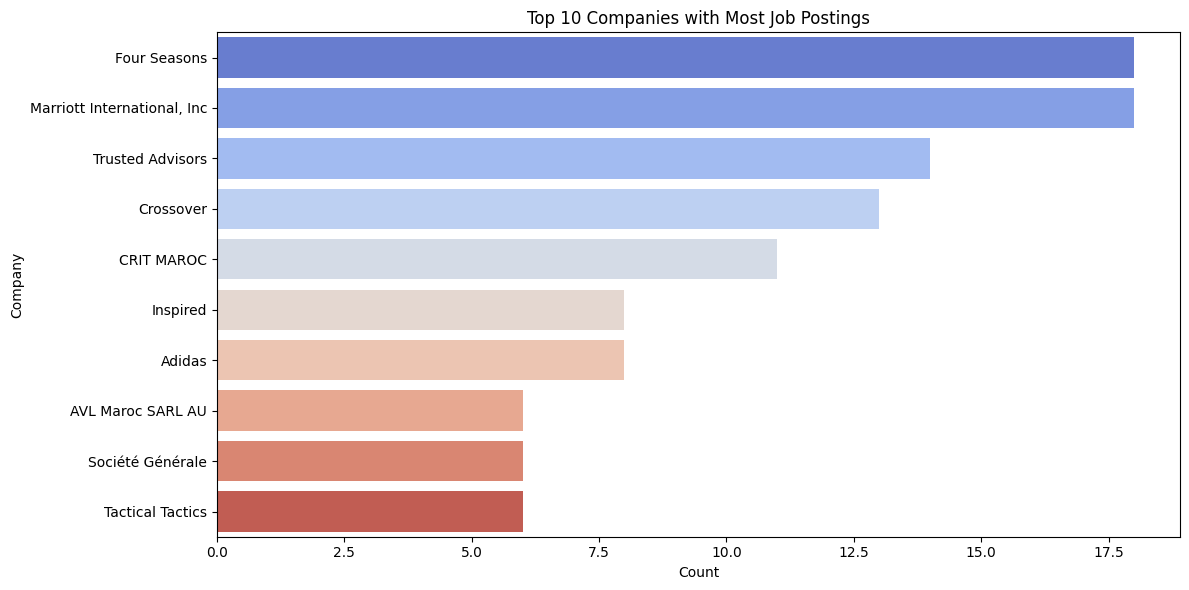

In [5]:
# Top 10 companies with the most job postings
top_companies = df["Company"].value_counts().head(10)

# Bar plot for companies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="coolwarm")
plt.title("Top 10 Companies with Most Job Postings")
plt.xlabel("Count")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


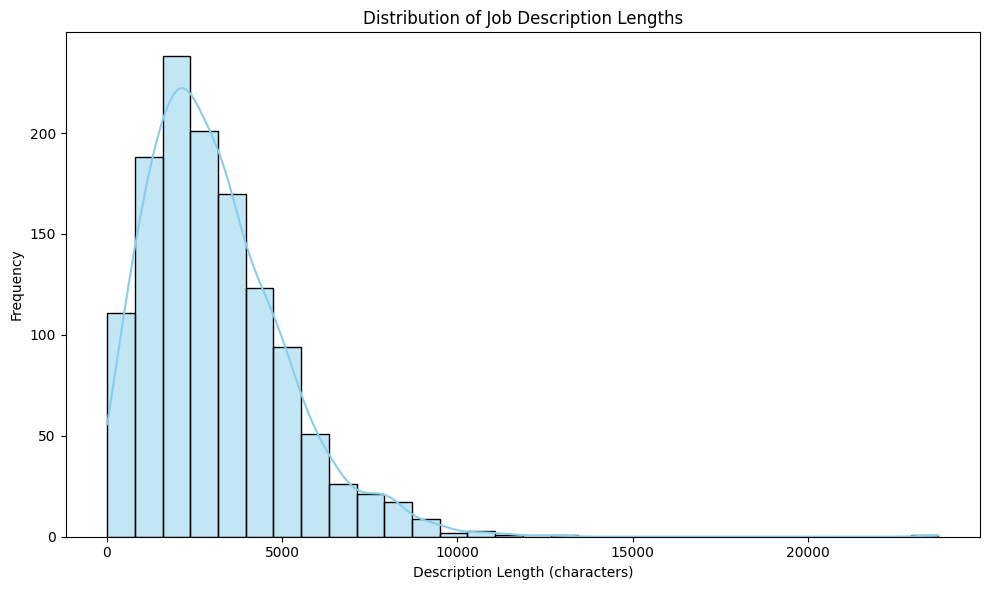

In [6]:
# Add a new column for description length
df["Description Length"] = df["Description"].str.len()

# Histogram for description lengths
plt.figure(figsize=(10, 6))
sns.histplot(df["Description Length"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Job Description Lengths")
plt.xlabel("Description Length (characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\imane\AppData\Local\Temp\ipykernel_20192\1744984403.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=word_df, palette="plasma")


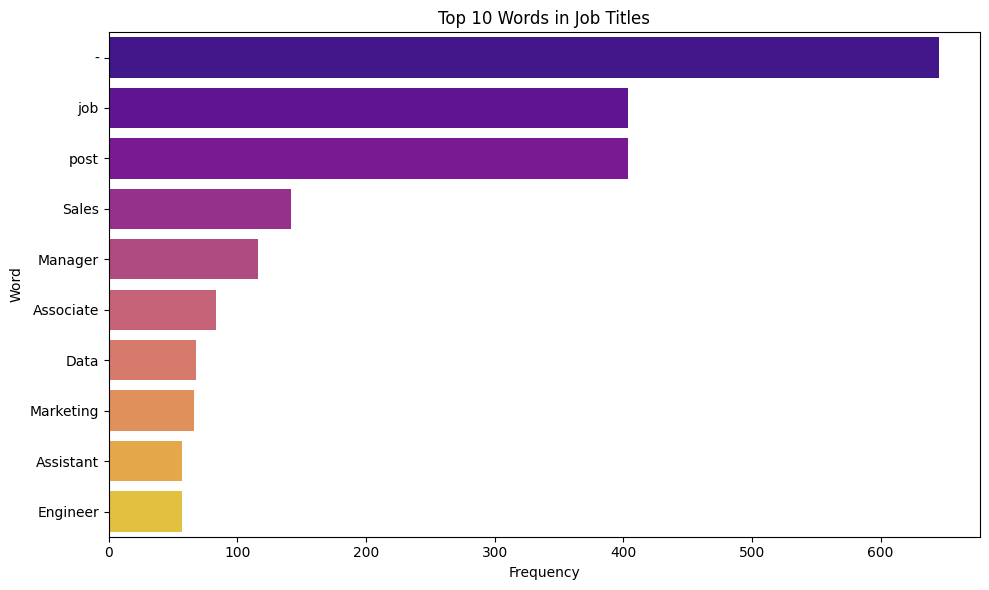

In [7]:
from collections import Counter

# Tokenize job titles and count word frequencies
words = " ".join(df["Job Title"].dropna()).split()
word_counts = Counter(words).most_common(10)

# Convert to DataFrame for plotting
word_df = pd.DataFrame(word_counts, columns=["Word", "Frequency"])

# Bar plot for top words in job titles
plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Word", data=word_df, palette="plasma")
plt.title("Top 10 Words in Job Titles")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


In [8]:
# Extract required experience
def extract_experience(description):
    pattern = r"(\d+[-\s]?(years?|months?)\s(of)?\s(experience))"
    match = re.search(pattern, description, re.IGNORECASE)
    return match.group() if match else "Not specified"

# Extract required skills
def extract_skills(description):
    skills_keywords = ["Python", "SQL", "Java", "Machine Learning", "Marketing", "Leadership", "AWS", "Kubernetes", "Docker"]
    skills_found = [skill for skill in skills_keywords if re.search(skill, description, re.IGNORECASE)]
    return ", ".join(skills_found) if skills_found else "Not specified"

# Extract required education
def extract_education(description):
    education_keywords = ["bachelor", "master", "phd", "mba", "bsc", "msc", "degree"]
    for keyword in education_keywords:
        if re.search(keyword, description, re.IGNORECASE):
            return keyword.capitalize() + " degree"
    return "Not specified"

# Extract recruitment type
def extract_recruitment_type(description):
    recruitment_keywords = ["full-time", "part-time", "contract", "freelance", "internship", "temporary"]
    for keyword in recruitment_keywords:
        if re.search(keyword, description, re.IGNORECASE):
            return keyword.capitalize()
    return "Not specified"


In [9]:
# Apply extraction functions to the Description column
df["Required Experience"] = df["Description"].apply(extract_experience)
df["Required Skills"] = df["Description"].apply(extract_skills)
df["Required Education"] = df["Description"].apply(extract_education)
df["Recruitment Type"] = df["Description"].apply(extract_recruitment_type)

# Display the updated dataset with extracted columns
df.head()


,Job Title,Company,Description,Description Length,Required Experience,Required Skills,Required Education,Recruitment Type
0,Sales Specialist,Google,minimum qualifications bachelors degree or equ...,2724,Not specified,Not specified,Bachelor degree,Not specified
1,Apple Solutions Consultant,Apple,description as an asc you will be highly influ...,826,Not specified,Not specified,Not specified,Not specified
2,Licensing Coordinator - Consumer Products,Netflix,its an amazing time to be joining netflix as w...,3197,Not specified,Marketing,Master degree,Not specified
3,Web Designer,Robert Half,description web designers looking to expand yo...,2468,Not specified,"Java, Marketing",Not specified,Contract
4,Web Developer,TrackFive,at trackfive weve got big goals were on a miss...,3124,Not specified,"SQL, Java",Not specified,Not specified


C:\Users\imane\AppData\Local\Temp\ipykernel_20192\1530102374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Recruitment Type", data=df, order=df["Recruitment Type"].value_counts().index, palette="coolwarm")


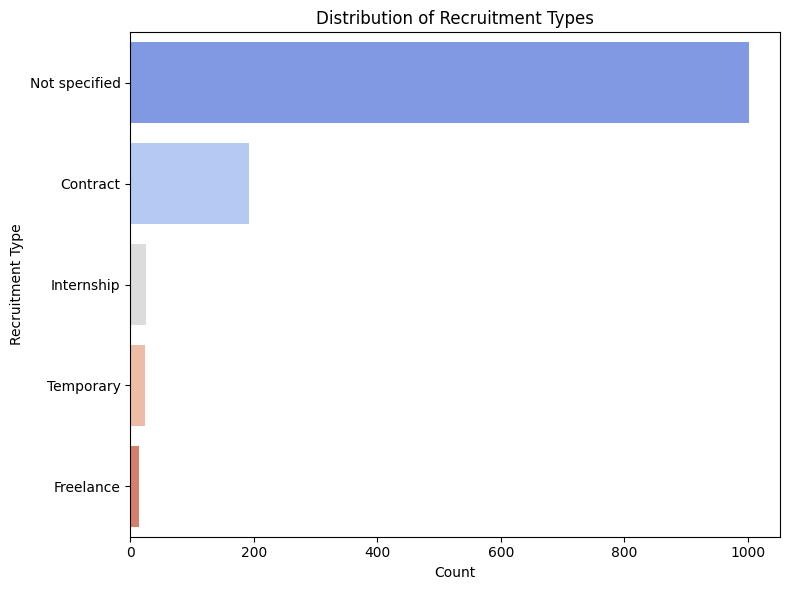

In [10]:
# Countplot for recruitment types
plt.figure(figsize=(8, 6))
sns.countplot(y="Recruitment Type", data=df, order=df["Recruitment Type"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Recruitment Types")
plt.xlabel("Count")
plt.ylabel("Recruitment Type")
plt.tight_layout()
plt.show()


C:\Users\imane\AppData\Local\Temp\ipykernel_20192\2843773843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Required Education", data=df, order=df["Required Education"].value_counts().index, palette="viridis")


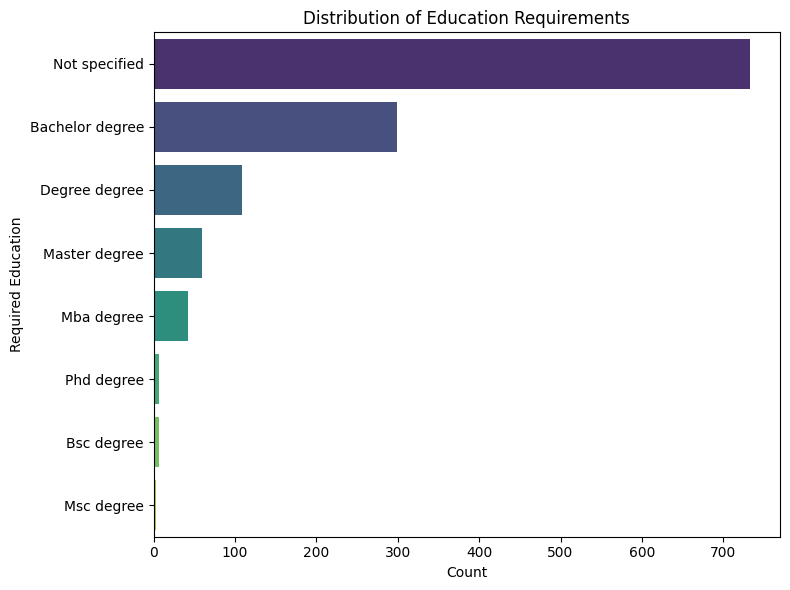

In [11]:
# Countplot for education requirements
plt.figure(figsize=(8, 6))
sns.countplot(y="Required Education", data=df, order=df["Required Education"].value_counts().index, palette="viridis")
plt.title("Distribution of Education Requirements")
plt.xlabel("Count")
plt.ylabel("Required Education")
plt.tight_layout()
plt.show()


C:\Users\imane\AppData\Local\Temp\ipykernel_20192\3680817916.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Skill", data=skills_df, palette="plasma")


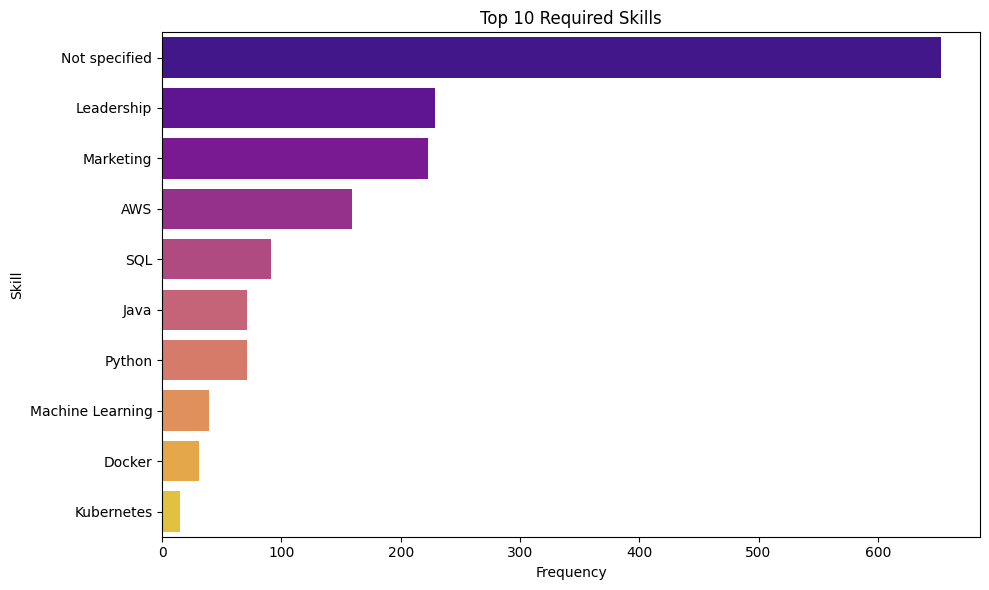

In [12]:
# Count top skills
from collections import Counter

skills_list = ", ".join(df["Required Skills"]).split(", ")
skills_counter = Counter(skills_list)
top_skills = skills_counter.most_common(10)
skills_df = pd.DataFrame(top_skills, columns=["Skill", "Frequency"])

# Bar plot for top skills
plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Skill", data=skills_df, palette="plasma")
plt.title("Top 10 Required Skills")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()


C:\Users\imane\AppData\Local\Temp\ipykernel_20192\1221088495.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Required Experience", data=df, order=df["Required Experience"].value_counts().index[:10], palette="magma")


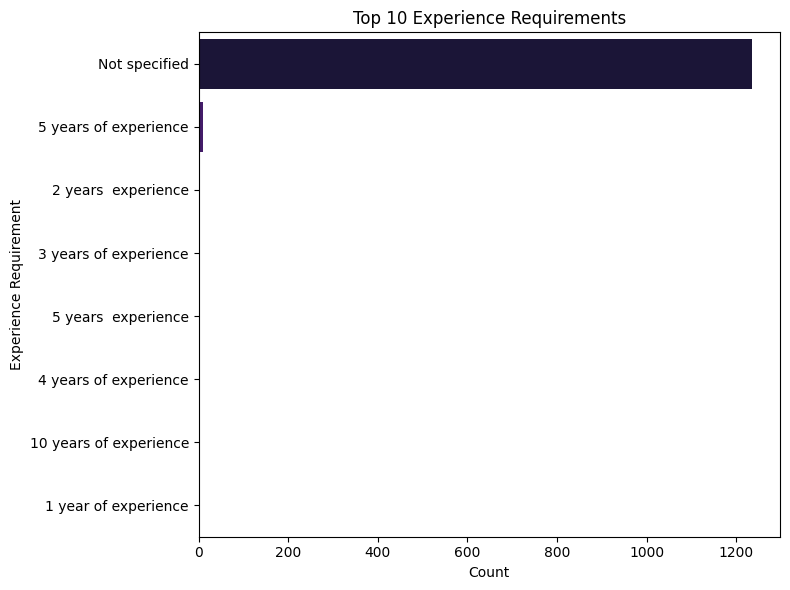

In [13]:
# Countplot for experience requirements
plt.figure(figsize=(8, 6))
sns.countplot(y="Required Experience", data=df, order=df["Required Experience"].value_counts().index[:10], palette="magma")
plt.title("Top 10 Experience Requirements")
plt.xlabel("Count")
plt.ylabel("Experience Requirement")
plt.tight_layout()
plt.show()
